In [1]:
# competition link: https://www.kaggle.com/competitions/playground-series-s3e16/overview/description
# Original Dataset Link: https://www.kaggle.com/datasets/sidhus/crab-age-prediction
# Evaluation Criteria: Mean Absolute Error (MAE),

In [2]:
# Imorting Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
sns.set_context('paper')#sets the size of the charts
style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,KFold, cross_val_score

In [3]:
# Reading data
df = pd.read_csv('train.csv')
df_org = pd.read_csv('CrabAgePrediction.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('CrabAgePrediction.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB


In [5]:
# No Null values


In [6]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


In [7]:
df

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8
...,...,...,...,...,...,...,...,...,...,...
74046,74046,F,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,10
74047,74047,I,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,6
74048,74048,F,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,10
74049,74049,I,1.2125,0.9625,0.3125,16.768729,8.972617,2.919999,4.280774,8


In [8]:
# Since id is not requeired, we drop this
df.drop('id', 1, inplace=True)

In [9]:
df

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8
...,...,...,...,...,...,...,...,...,...
74046,F,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,10
74047,I,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,6
74048,F,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,10
74049,I,1.2125,0.9625,0.3125,16.768729,8.972617,2.919999,4.280774,8


In [10]:
df_fin = pd.concat([df, df_org])

In [11]:
df_fin.reset_index(drop=True, inplace=True)

In [12]:
df_fin

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8
...,...,...,...,...,...,...,...,...,...
77939,F,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8
77940,F,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10
77941,I,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5
77942,I,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6


In [13]:
df_fin.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [14]:
df_fin.drop_duplicates(inplace=True)

In [15]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77944 entries, 0 to 77943
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             77944 non-null  object 
 1   Length          77944 non-null  float64
 2   Diameter        77944 non-null  float64
 3   Height          77944 non-null  float64
 4   Weight          77944 non-null  float64
 5   Shucked Weight  77944 non-null  float64
 6   Viscera Weight  77944 non-null  float64
 7   Shell Weight    77944 non-null  float64
 8   Age             77944 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 5.9+ MB


In [16]:
# Exploratory Data Analysis

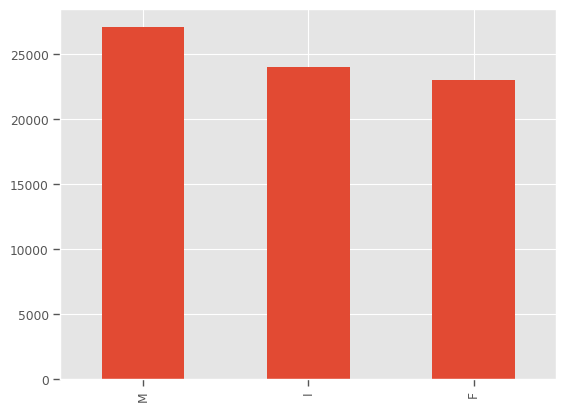

<Figure size 1000x800 with 0 Axes>

In [17]:
df['Sex'].value_counts().plot.bar()
plt.figure(figsize=(10,8))
plt.show()

<AxesSubplot: ylabel='Frequency'>

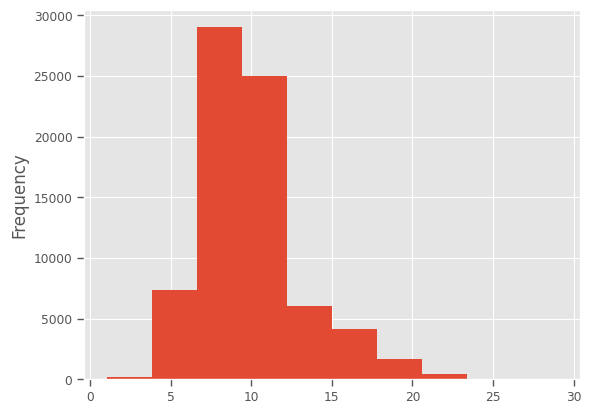

In [18]:
df['Age'].plot.hist()

<AxesSubplot: >

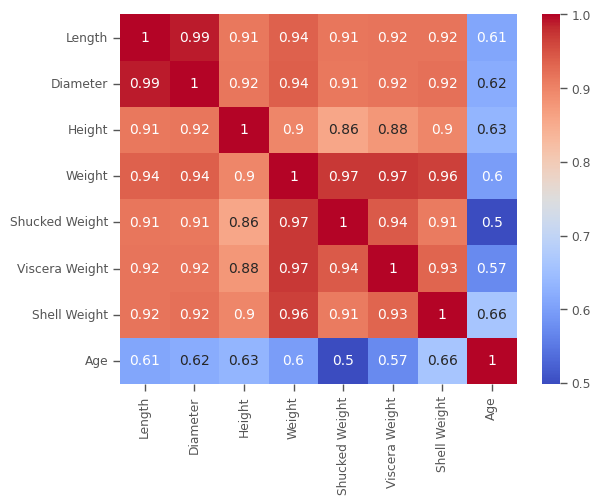

In [19]:
sns.heatmap(df_fin.corr(), annot=True, cmap='coolwarm')

<AxesSubplot: >

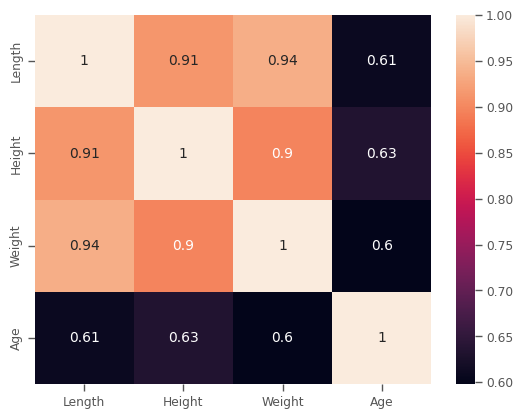

In [20]:
sns.heatmap(df_fin.drop(['Diameter','Shucked Weight','Viscera Weight', 'Shell Weight'],1).corr(), annot=True)

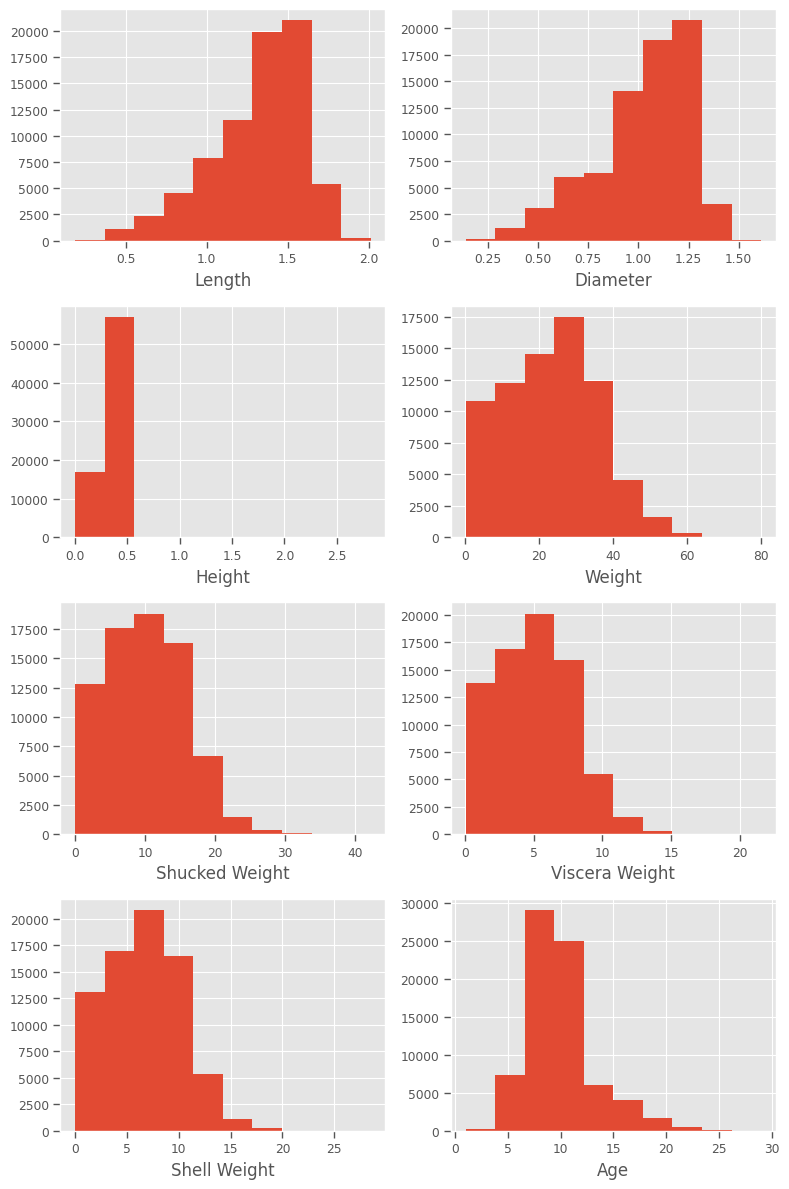

In [21]:
# fig, axs = plt.subplots(len(df_fin.drop('Sex',1).columns), len(df_fin.drop('Sex',1).columns), figsize=(10, 10))
num_rows = 4
num_cols = 4
fig_width = 8
fig_height = 3 * num_rows

# Plot histograms for all columns against each other
fig, axs = plt.subplots(num_rows, 2, figsize=(fig_width, fig_height))

for i, column1 in enumerate(df.drop('Sex',1).columns):
    row = i // 2
    col = i % 2
    axs[row, col].hist(df[column1])
    axs[row, col].set_xlabel(column1)

# Remove empty subplots if the number of columns is odd
if num_cols % 2 != 0:
    fig.delaxes(axs[num_rows - 1, 1])

plt.tight_layout()
plt.show()

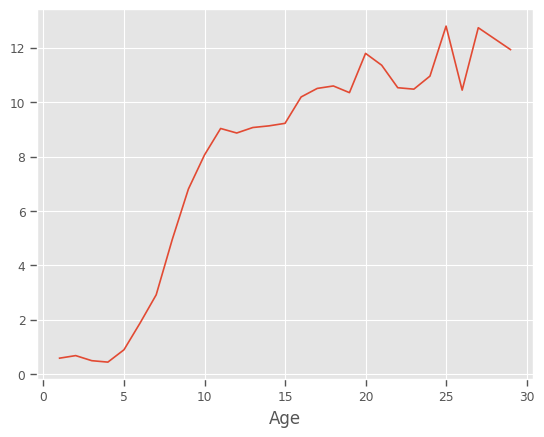

In [22]:
df['Shell Weight'].groupby(df['Age']).mean().plot.line()
plt.show()

In [23]:
df['Age'].groupby(df['Sex']).mean()

Sex
F    11.341547
I     7.599073
M    10.895953
Name: Age, dtype: float64

<AxesSubplot: xlabel='Sex'>

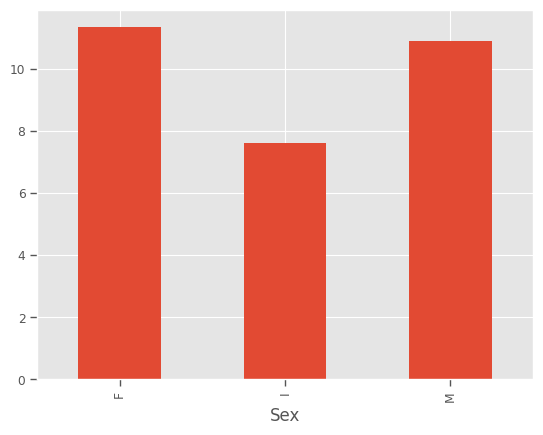

In [24]:
df['Age'].groupby(df['Sex']).mean().plot.bar()

In [25]:
# This means shell weight continious to grow with age

In [26]:
df['Shell Weight'].groupby(df['Age']).mean()

Age
1      0.582937
2      0.677351
3      0.490422
4      0.437707
5      0.892284
6      1.877023
7      2.914198
8      4.953074
9      6.804733
10     8.059078
11     9.032142
12     8.865764
13     9.067574
14     9.128342
15     9.221308
16    10.192044
17    10.506033
18    10.596270
19    10.350750
20    11.795066
21    11.360445
22    10.531695
23    10.478920
24    10.959037
25    12.797774
26    10.443061
27    12.738375
29    11.934352
Name: Shell Weight, dtype: float64

In [27]:
df_fin.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age'],
      dtype='object')

In [28]:
from sklearn.preprocessing import MinMaxScaler
df_norm = pd.DataFrame(MinMaxScaler().fit_transform(df_fin[['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight']]), columns=['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight']).merge(df_fin['Age'], on=df_fin.index)

In [29]:
df_norm.drop('key_0',1, inplace=True)

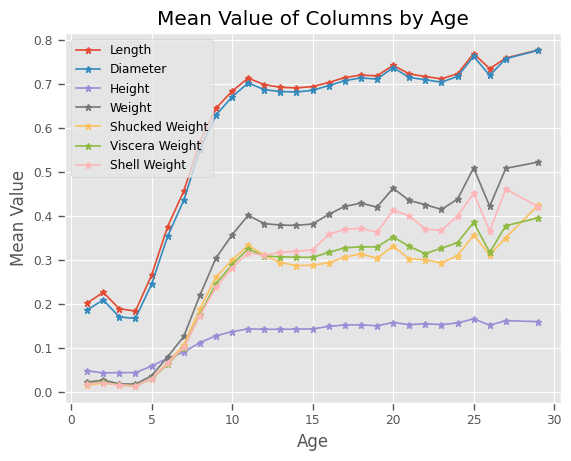

In [30]:
# Group by 'Age' and calculate the mean for each column
grouped = df_norm.groupby('Age').mean()

# Plot line graph for each column
grouped.plot.line(marker='*')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Mean Value')
plt.title('Mean Value of Columns by Age')

# Show the plot
plt.show()

An interesting Oversvation, The overall properties like height weight diameter exponentially grows by the age of 5 - 10 and then reaches saturation point


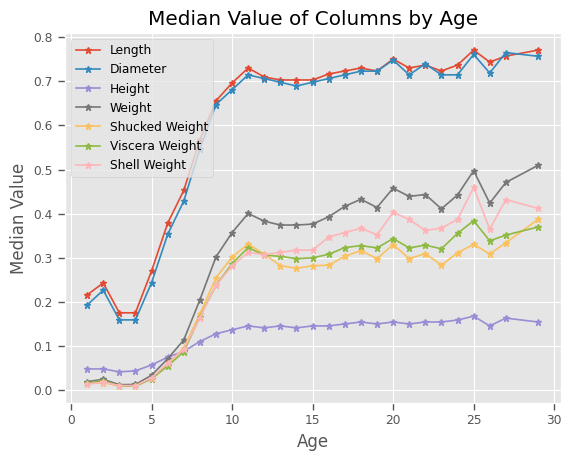

In [31]:
# Group by 'Age' and calculate the mean for each column
grouped = df_norm.groupby('Age').median()

# Plot line graph for each column
grouped.plot.line(marker='*')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Median Value')
plt.title('Median Value of Columns by Age')

# Show the plot
plt.show()

In [32]:
df['Age'].groupby(df['Sex']).mean()

Sex
F    11.341547
I     7.599073
M    10.895953
Name: Age, dtype: float64

In [33]:
#Lets first try with normal encoding

In [34]:
df_fin = pd.get_dummies(df_fin)

In [35]:
df_fin

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9,0,1,0
1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8,0,1,0
2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9,0,0,1
3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11,1,0,0
4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
77939,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8,1,0,0
77940,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10,1,0,0
77941,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5,0,1,0
77942,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6,0,1,0


In [36]:
df_fin.columns

Index(['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age', 'Sex_F', 'Sex_I', 'Sex_M'],
      dtype='object')

In [37]:
df_fin_norm = pd.DataFrame(MinMaxScaler().fit_transform(df_fin[['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight']]), columns=['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight']).merge(df_fin[['Age', 'Sex_F', 'Sex_I', 'Sex_M']], on=df_fin.index)

In [38]:
df_fin_norm.drop('key_0', 1, inplace=True)

In [39]:
df_fin_norm

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
0,0.722973,0.697479,0.132743,0.361254,0.301278,0.308097,0.291978,9,0,1,0
1,0.493243,0.462185,0.097345,0.129449,0.106590,0.107307,0.118087,8,0,1,0
2,0.648649,0.655462,0.132743,0.308837,0.268325,0.257406,0.232686,9,0,0,1
3,0.817568,0.857143,0.176991,0.632194,0.482179,0.509843,0.525660,11,1,0,0
4,0.574324,0.588235,0.119469,0.290243,0.283457,0.208690,0.207773,8,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
77939,0.689189,0.672269,0.115044,0.309368,0.275723,0.271231,0.222720,8,1,0,0
77940,0.736486,0.722689,0.154867,0.429786,0.365837,0.332456,0.342302,10,1,0,0
77941,0.236486,0.218487,0.057522,0.024438,0.017485,0.023700,0.020927,5,0,1,0
77942,0.472973,0.428571,0.092920,0.128564,0.106254,0.107966,0.103139,6,0,1,0


In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import BayesianRidge, HuberRegressor, PassiveAggressiveRegressor, TheilSenRegressor
from sklearn.linear_model import OrthogonalMatchingPursuit
from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [42]:
# Instantiate LightGBM regressor
# lgbm_regressor = LGBMRegressor()

# # Define the parameter grid for LightGBM
# lgbm_params = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.1, 0.01, 0.001],
#     'max_depth': [3, 5, 7],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0]
# }

# Instantiate CatBoost regressor
catboost_regressor = CatBoostRegressor()

# Define the parameter grid for CatBoost
catboost_params = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bylevel': [0.8, 1.0]
}

In [43]:
X = df_fin_norm.drop('Age',1)
y= df_fin_norm['Age']

In [44]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,BaggingRegressor
from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
models = {
    "                     Linear Regression": LinearRegression(),
    " Linear Regression (L2 Regularization)": Ridge(),
    " Linear Regression (L1 Regularization)": Lasso(),
    "                   K-Nearest Neighbors": KNeighborsRegressor(),
    "Support Vector Machine (Linear Kernel)": LinearSVR(),
    "   Support Vector Machine (RBF Kernel)": SVR(),
    "                         Decision Tree": DecisionTreeRegressor(),
    "                         Random Forest": RandomForestRegressor(),
    "                     Gradient Boosting": GradientBoostingRegressor(loss='absolute_error'),
    "                               XGBoost": XGBRegressor(),
#     "                              LightGBM": LGBMRegressor(),
    "                              CatBoost": CatBoostRegressor(verbose=0)
}

for name, model in models.items():
    print(name, cross_val_score(model,X, y, scoring='neg_mean_absolute_error', cv=7, n_jobs=-1).mean())

                     Linear Regression -1.4881596792109966
 Linear Regression (L2 Regularization) -1.4879424099732306
 Linear Regression (L1 Regularization) -2.3263981744348845
                   K-Nearest Neighbors -1.5421357747859474
Support Vector Machine (Linear Kernel) -1.4476490416799195
   Support Vector Machine (RBF Kernel) -1.4104450116954674
                         Decision Tree -1.994591952432502
                         Random Forest -1.469536208580124
                     Gradient Boosting -1.4165335741787906
                               XGBoost -1.4149874886284373
                              CatBoost -1.3998635240313315


In [46]:
bagging = CatBoostRegressor(verbose=0)
bagging.fit(X, y)

In [48]:
df_test=pd.read_csv('test.csv')

In [49]:
df_test =pd.get_dummies(df_test)

In [55]:
df_test

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_F,Sex_I,Sex_M
0,74051,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552,0,1,0
1,74052,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930,0,1,0
2,74053,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415,1,0,0
3,74054,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676,1,0,0
4,74055,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
49363,123414,1.3000,1.0375,0.3250,16.315137,6.690482,5.173784,3.756309,1,0,0
49364,123415,1.0375,0.7625,0.2625,10.276694,4.436697,1.998640,3.543687,0,1,0
49365,123416,1.4875,1.1625,0.3625,31.382897,11.396499,6.846404,8.788345,1,0,0
49366,123417,1.2375,0.9500,0.2875,15.663099,6.095142,3.727959,4.961163,1,0,0


In [56]:
df_test_norm = pd.DataFrame(MinMaxScaler().fit_transform(df_test[['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight']]), columns=['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight'])

In [57]:
df_test_norm

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,0.466216,0.420168,0.097345,0.106959,0.086079,0.079658,0.094170
1,0.527027,0.504202,0.097345,0.193023,0.166106,0.150099,0.138017
2,0.594595,0.571429,0.115044,0.181335,0.131137,0.179724,0.167912
3,0.736486,0.571429,0.137168,0.353816,0.316745,0.303489,0.245640
4,0.500000,0.478992,0.092920,0.146272,0.130464,0.113891,0.115595
...,...,...,...,...,...,...,...
49363,0.601351,0.605042,0.115044,0.203117,0.158036,0.239631,0.130543
49364,0.459459,0.420168,0.092920,0.127678,0.104573,0.092166,0.123069
49365,0.702703,0.689076,0.128319,0.391358,0.269670,0.317314,0.307424
49366,0.567568,0.546218,0.101770,0.194971,0.143914,0.172482,0.172895


In [65]:
df_test

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_F,Sex_I,Sex_M
0,74051,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552,0,1,0
1,74052,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930,0,1,0
2,74053,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415,1,0,0
3,74054,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676,1,0,0
4,74055,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
49363,123414,1.3000,1.0375,0.3250,16.315137,6.690482,5.173784,3.756309,1,0,0
49364,123415,1.0375,0.7625,0.2625,10.276694,4.436697,1.998640,3.543687,0,1,0
49365,123416,1.4875,1.1625,0.3625,31.382897,11.396499,6.846404,8.788345,1,0,0
49366,123417,1.2375,0.9500,0.2875,15.663099,6.095142,3.727959,4.961163,1,0,0


In [66]:
df_test_norm

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,0.466216,0.420168,0.097345,0.106959,0.086079,0.079658,0.094170
1,0.527027,0.504202,0.097345,0.193023,0.166106,0.150099,0.138017
2,0.594595,0.571429,0.115044,0.181335,0.131137,0.179724,0.167912
3,0.736486,0.571429,0.137168,0.353816,0.316745,0.303489,0.245640
4,0.500000,0.478992,0.092920,0.146272,0.130464,0.113891,0.115595
...,...,...,...,...,...,...,...
49363,0.601351,0.605042,0.115044,0.203117,0.158036,0.239631,0.130543
49364,0.459459,0.420168,0.092920,0.127678,0.104573,0.092166,0.123069
49365,0.702703,0.689076,0.128319,0.391358,0.269670,0.317314,0.307424
49366,0.567568,0.546218,0.101770,0.194971,0.143914,0.172482,0.172895


In [76]:
df_test_fin = df_test[['Sex_F', 'Sex_I', 'Sex_M']].merge(df_test_norm, right_index=True,left_index=True)

In [77]:
df_test_fin

,Sex_F,Sex_I,Sex_M,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,0,1,0,0.466216,0.420168,0.097345,0.106959,0.086079,0.079658,0.094170
1,0,1,0,0.527027,0.504202,0.097345,0.193023,0.166106,0.150099,0.138017
2,1,0,0,0.594595,0.571429,0.115044,0.181335,0.131137,0.179724,0.167912
3,1,0,0,0.736486,0.571429,0.137168,0.353816,0.316745,0.303489,0.245640
4,0,1,0,0.500000,0.478992,0.092920,0.146272,0.130464,0.113891,0.115595
...,...,...,...,...,...,...,...,...,...,...
49363,1,0,0,0.601351,0.605042,0.115044,0.203117,0.158036,0.239631,0.130543
49364,0,1,0,0.459459,0.420168,0.092920,0.127678,0.104573,0.092166,0.123069
49365,1,0,0,0.702703,0.689076,0.128319,0.391358,0.269670,0.317314,0.307424
49366,1,0,0,0.567568,0.546218,0.101770,0.194971,0.143914,0.172482,0.172895


In [78]:
y_pred = bagging.predict(df_test_fin)

In [79]:
y_pred

array([ 7.6268939 ,  7.78315378, 10.95483619, ..., 13.56646778,
        9.81128731, 12.09552344])

In [80]:
df_sub = pd.read_csv('sample_submission.csv')

In [82]:
df_sub['Age'] = y_pred

In [83]:
df_sub

,id,Age
0,74051,7.626894
1,74052,7.783154
2,74053,10.954836
3,74054,9.383406
4,74055,7.360975
...,...,...
49363,123414,9.557000
49364,123415,8.252347
49365,123416,13.566468
49366,123417,9.811287


In [84]:
df_sub.to_csv('submission.csv',index=False)